<a href="https://colab.research.google.com/github/bcguilherme/Data_preparation_case/blob/main/Aprova%C3%A7%C3%A3o_Alunos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:
import pandas as pd
import statsmodels as sm
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
file_path = '/content/C+¦pia de aprovacao_alunos (1).xlsx'

In [7]:
df = pd.read_excel(file_path)

In [8]:
df.head()

,UF,ano_2015,ano_2016
0,Rondonia,77,85
1,Acre,79,81
2,Amazonas,83,85
3,Roraima,81,82
4,Para,73,76


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   UF        27 non-null     object
 1   ano_2015  27 non-null     int64 
 2   ano_2016  27 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 776.0+ bytes


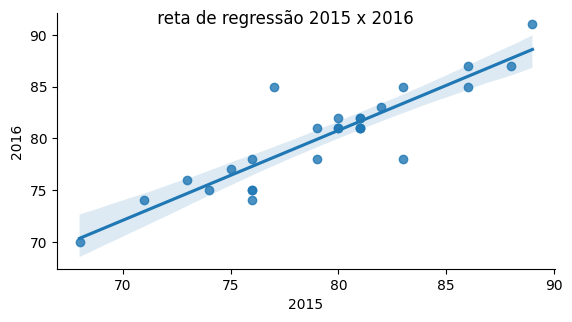

In [42]:
ax = sns.lmplot(x='ano_2015', y='ano_2016', data=df)
ax.fig.set_size_inches(6,3)
ax.fig.suptitle(' reta de regressão 2015 x 2016')
ax.set_xlabels('2015')
ax.set_ylabels('2016')
ax;

In [45]:
df.corr()

<ipython-input-45-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,ano_2015,ano_2016
ano_2015,1.000000,0.894957
ano_2016,0.894957,1.000000


In [54]:
y = df['ano_2016']
x = sm.add_constant(df['ano_2015'])

model = sm.OLS(y, x).fit()

In [57]:
resultado_regressao = model = sm.OLS(y, x).fit()
print(resultado_regressao.summary())

                            OLS Regression Results                            
Dep. Variable:               ano_2016   R-squared:                       0.801
Model:                            OLS   Adj. R-squared:                  0.793
Method:                 Least Squares   F-statistic:                     100.6
Date:                Mon, 14 Aug 2023   Prob (F-statistic):           3.02e-10
Time:                        19:31:01   Log-Likelihood:                -58.476
No. Observations:                  27   AIC:                             121.0
Df Residuals:                      25   BIC:                             123.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         11.3143      6.880      1.645      0.1

In [63]:
df['Y_previsto'] = resultado_regressao.predict()
df.head()

,UF,ano_2015,ano_2016,Y_previsto,residuo,y_previsto
0,Rondonia,77,85,78.159571,85,85
1,Acre,79,81,79.895812,81,81
2,Amazonas,83,85,83.368294,85,85
3,Roraima,81,82,81.632053,82,82
4,Para,73,76,74.687089,76,76


In [68]:

df['residuo'] = df['ano_2016'] - df['Y_previsto']


print(df.head())


         UF  ano_2015  ano_2016  Y_previsto   residuo  y_previsto
0  Rondonia        77        85   78.159571  6.840429          85
1      Acre        79        81   79.895812  1.104188          81
2  Amazonas        83        85   83.368294  1.631706          85
3   Roraima        81        82   81.632053  0.367947          82
4      Para        73        76   74.687089  1.312911          76
